<a href="https://colab.research.google.com/github/piyush9pp/steganography/blob/main/loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd

In [12]:
import numpy as np

In [15]:
path1="/content/test_data.csv"
path2="/content/train_data.csv"
test_data=pd.read_csv(path1)
train_data=pd.read_csv(path2)

In [5]:
test_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [16]:
train_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [17]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [19]:
import matplotlib.pyplot as plt

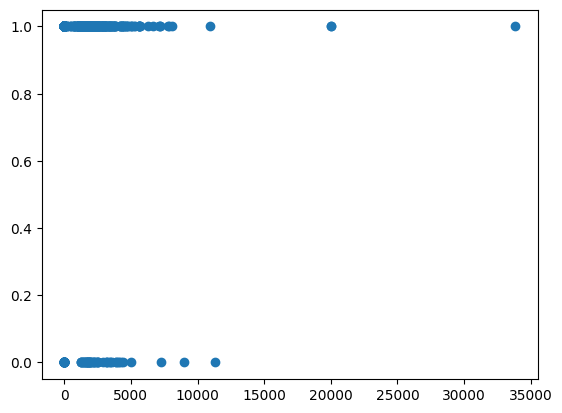

In [20]:
plt.scatter(train_data['CoapplicantIncome'],train_data['Credit_History'])
plt.show()

In [21]:
print("Rows:",len(train_data))

Rows: 614


In [22]:
print("Columns:",len(train_data.columns))

Columns: 13


In [23]:
print("Shape:",train_data.shape)

Shape: (614, 13)


In [24]:
train_dataall=train_data.columns
train_dataall

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [25]:
def exp_obj(df,feature_name):
  if df[feature_name].dtype=='object':
    print(df[feature_name].value_counts())

In [34]:
exp_obj(train_data,'Gender')

Gender
Male      489
Female    112
Name: count, dtype: int64


In [37]:
for featureName in train_dataall:
  if train_data[featureName].dtype == 'object':
    print('\n"' + str(featureName) + '\'s" Values with count are:')
    exp_obj(train_data,str(featureName))


"Loan_ID's" Values with count are:
Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: count, Length: 614, dtype: int64

"Gender's" Values with count are:
Gender
Male      489
Female    112
Name: count, dtype: int64

"Married's" Values with count are:
Married
Yes    398
No     213
Name: count, dtype: int64

"Dependents's" Values with count are:
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

"Education's" Values with count are:
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

"Self_Employed's" Values with count are:
Self_Employed
No     500
Yes     82
Name: count, dtype: int64

"Property_Area's" Values with count are:
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

"Loan_Status's" Values with count are:
Loan_Status
Y    422
N    192
Name: count, dtype: int64


In [38]:
import missingno as msno

In [39]:
train_data
train_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

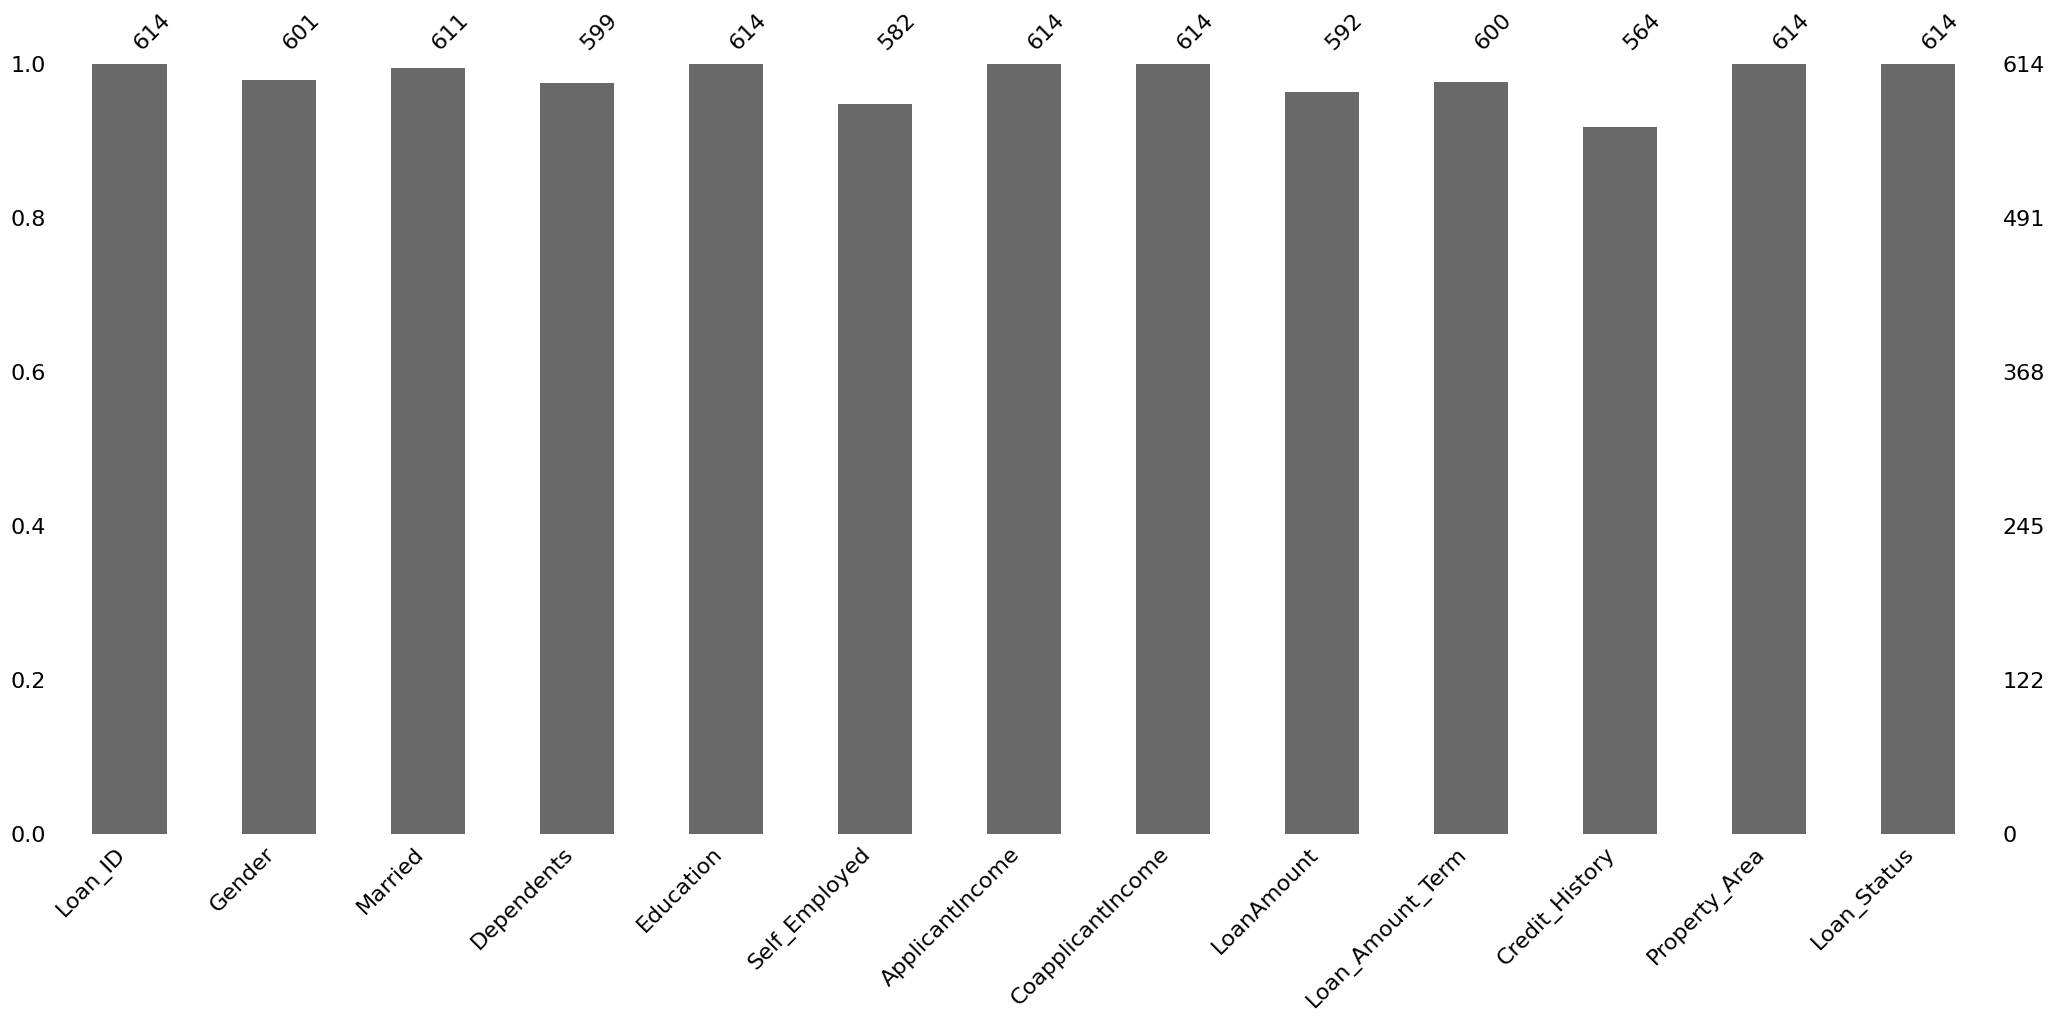

In [41]:
msno.bar(train_data)

<Axes: >

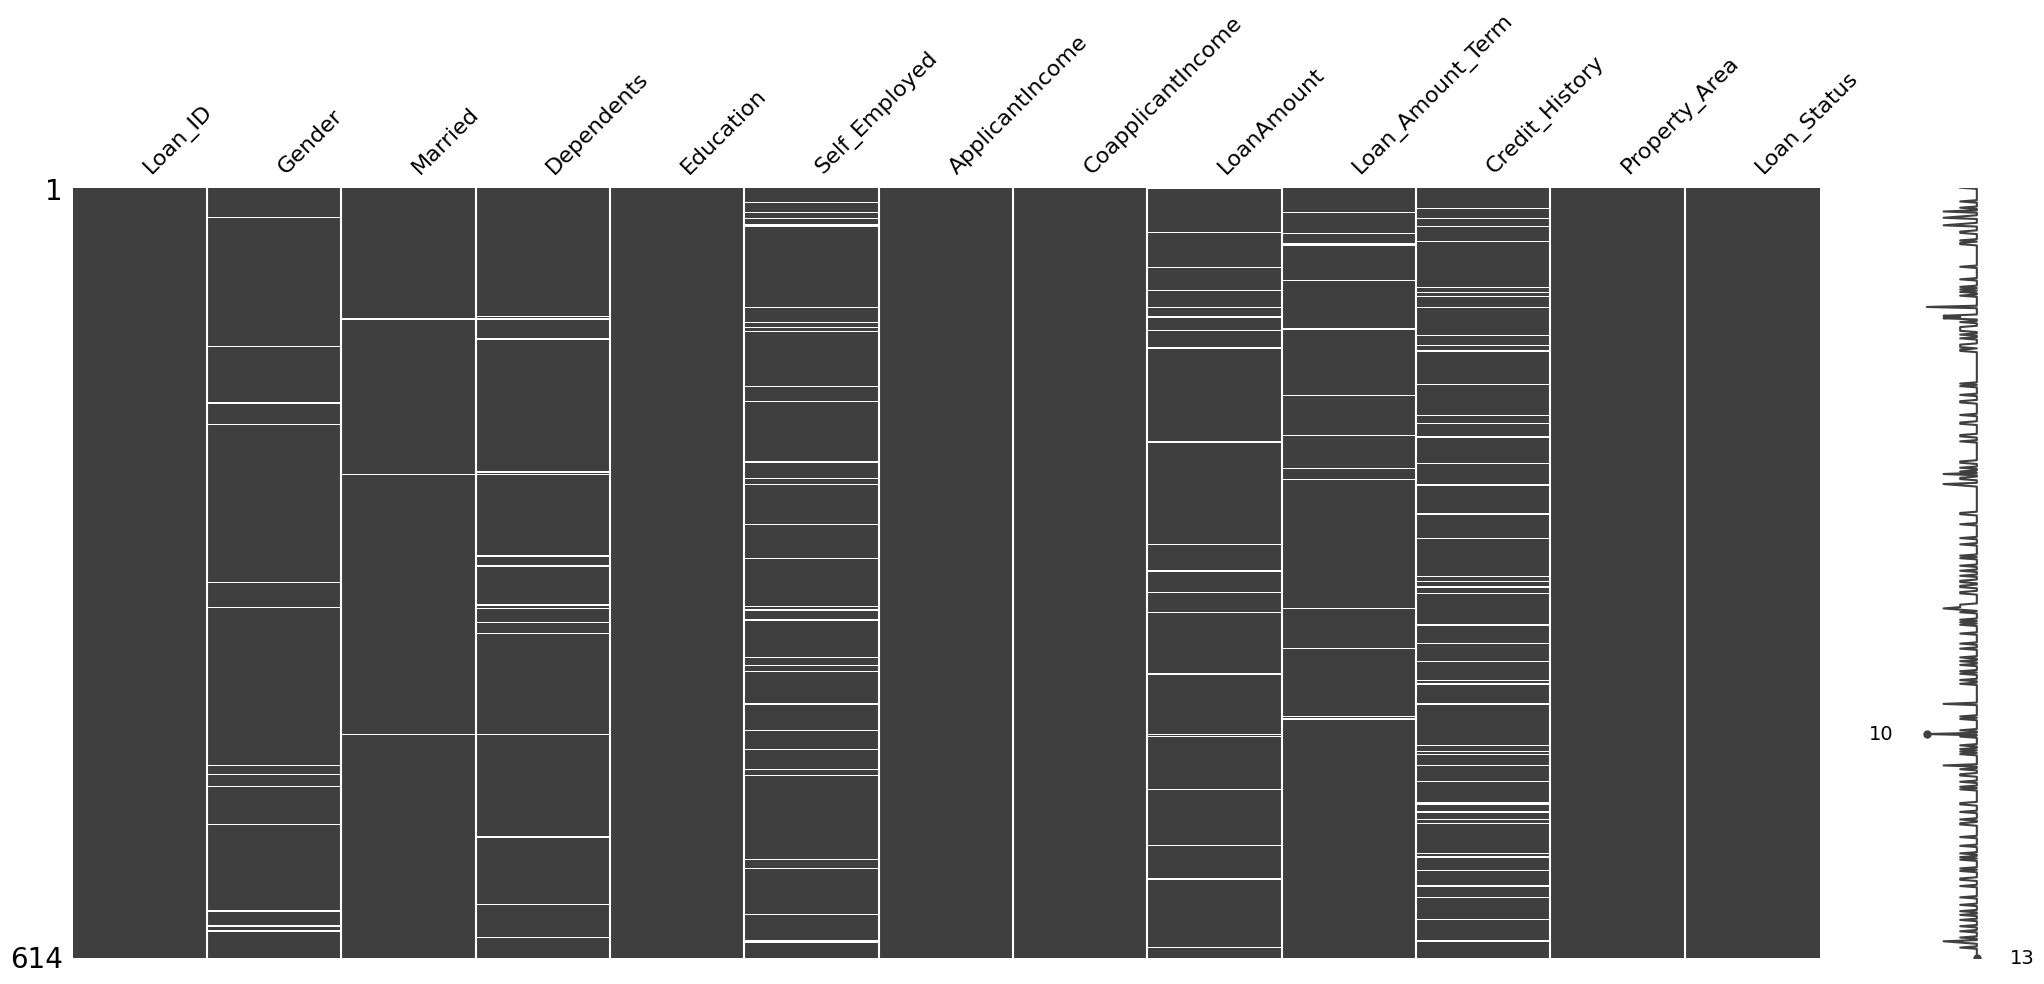

In [42]:
msno.matrix(train_data)

In [43]:
train_data['Credit_History'].fillna(train_data['Credit_History'].mode(), inplace=True)

In [44]:
test_data['Credit_History'].fillna(test_data['Credit_History'].mode(),inplace=True)

In [45]:
train_data['LoanAmount'].fillna(train_data['LoanAmount'].mean(), inplace=True)
test_data['LoanAmount'].fillna(test_data['LoanAmount'].mean(),inplace=True)

In [51]:
train_data.Loan_Status= train_data.Loan_Status.replace({"Y":1,"N":0})
train_data.Gender=train_data.Gender.replace({"Male":1,"Female":0})
test_data.Gender=test_data.Gender.replace({"Male":1,"Female":0})

train_data.Self_Employed=train_data.Self_Employed.replace({"Yes":1,"No":0})
test_data.Self_Employed=test_data.Self_Employed.replace({"Yes":1,"No":0})

In [53]:
train_data['Gender'].fillna(train_data['Gender'].mode()[0],inplace=True)
test_data['Gender'].fillna(test_data['Gender'].mode()[0],inplace=True)

train_data['Dependents'].fillna(train_data['Dependents'].mode()[0],inplace=True)
test_data['Dependents'].fillna(test_data['Dependents'].mode()[0],inplace=True)

train_data['Married'].fillna(train_data['Married'].mode()[0],inplace=True)
test_data['Married'].fillna(test_data['Married'].mode()[0],inplace=True)

train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0],inplace=True)
test_data['Credit_History'].fillna(test_data['Credit_History'].mode()[0],inplace=True)

In [56]:
from sklearn.preprocessing import LabelEncoder
feature_col=['Property_Area','Education','Dependents']
Le=LabelEncoder()
for col in feature_col:
  train_data[col]=le.fit_transform(train_data[col])
  test_data[col]=le.fit_transform(test_data[col])

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('dark')

In [59]:
train_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,No,0,0,0.0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1.0,Yes,1,0,0.0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1.0,Yes,0,0,1.0,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1.0,Yes,0,1,0.0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1.0,No,0,0,0.0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,No,0,0,0.0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1.0,Yes,3,0,0.0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1.0,Yes,1,0,0.0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,1.0,Yes,2,0,0.0,7583,0.0,187.000000,360.0,1.0,2,1


In [60]:
test_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1.0,Yes,0,0,0.0,5720,0,110.0,360.0,1.0,2
1,LP001022,1.0,Yes,1,0,0.0,3076,1500,126.0,360.0,1.0,2
2,LP001031,1.0,Yes,2,0,0.0,5000,1800,208.0,360.0,1.0,2
3,LP001035,1.0,Yes,2,0,0.0,2340,2546,100.0,360.0,1.0,2
4,LP001051,1.0,No,0,1,0.0,3276,0,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,1.0,Yes,3,1,1.0,4009,1777,113.0,360.0,1.0,2
363,LP002975,1.0,Yes,0,0,0.0,4158,709,115.0,360.0,1.0,2
364,LP002980,1.0,No,0,0,0.0,3250,1993,126.0,360.0,1.0,1
365,LP002986,1.0,Yes,0,0,0.0,5000,2393,158.0,360.0,1.0,0


In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
from sklearn.metrics import accuracy_score

In [82]:
logistic_model=LogisticRegression()

In [83]:
train_features=['Credit_History','Education','Gender']
x_train=train_data[train_features].values
y_train=train_data['Loan_Status'].values
x_test=test_data[train_features].values

In [85]:
logistic_model.fit(x_train,y_train)

LogisticRegression()

In [86]:
predict_test=logistic_model.predict(x_test)
print(predict_test)

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [87]:
predicted=logistic_model.predict(x_test)

In [88]:
print('coefficient of model:', logistic_model.coef_)

coefficient of model: [[ 3.30731229 -0.32017129  0.10627074]]


In [89]:
print('Intercept of model', logistic_model.intercept_)

Intercept of model [-2.03319815]


<function matplotlib.pyplot.show(close=None, block=None)>

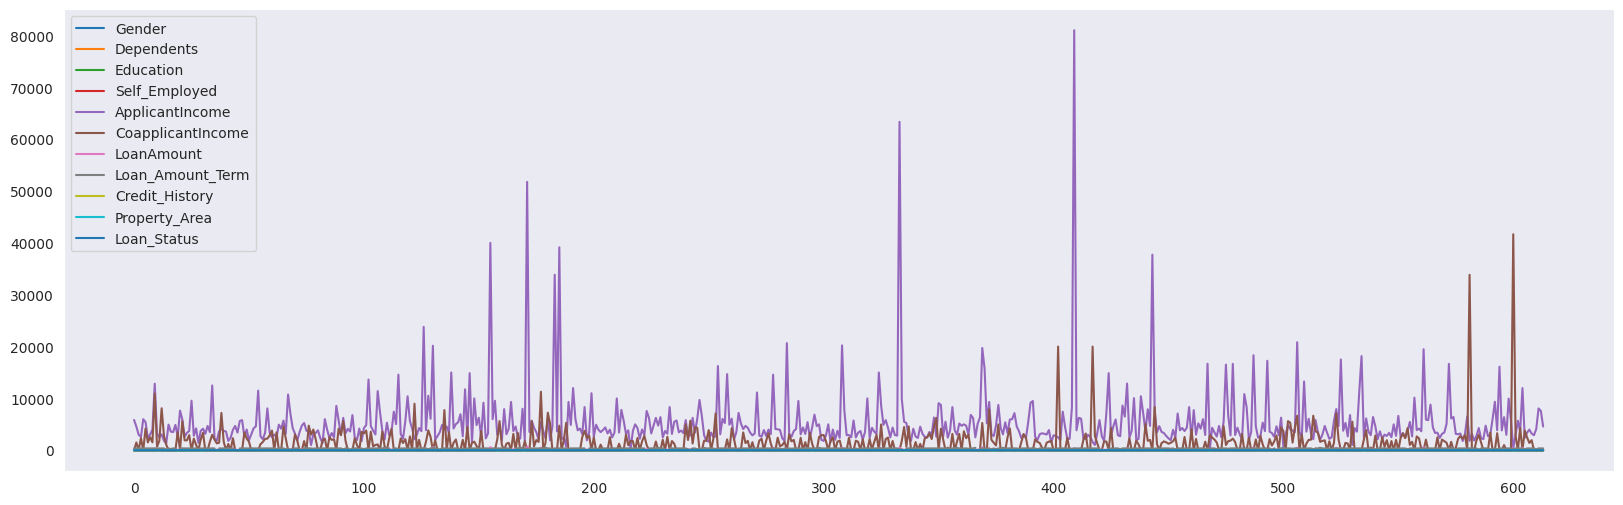

In [62]:
train_data.plot(figsize=(20,6))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

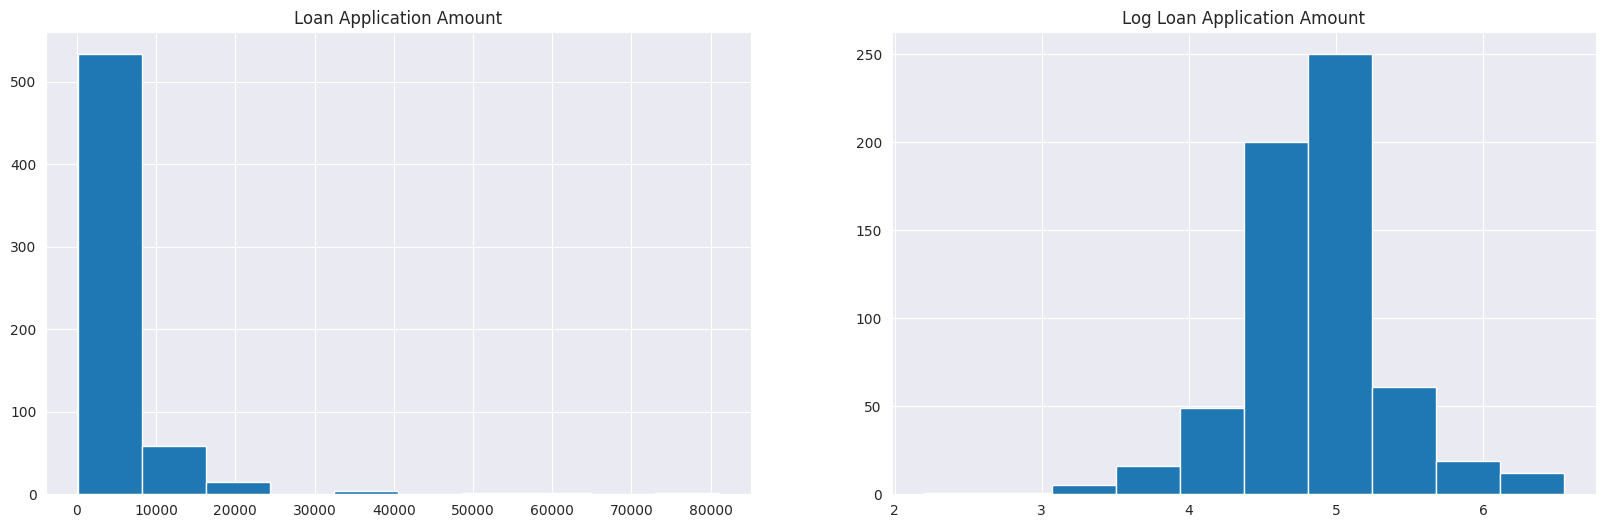

In [64]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
train_data['ApplicantIncome'].hist(bins=10)
plt.title("Loan Application Amount")

plt.subplot(1,2,2)
plt.grid()
plt.hist(np.log(train_data['LoanAmount']))
plt.title("Log Loan Application Amount")
plt.show

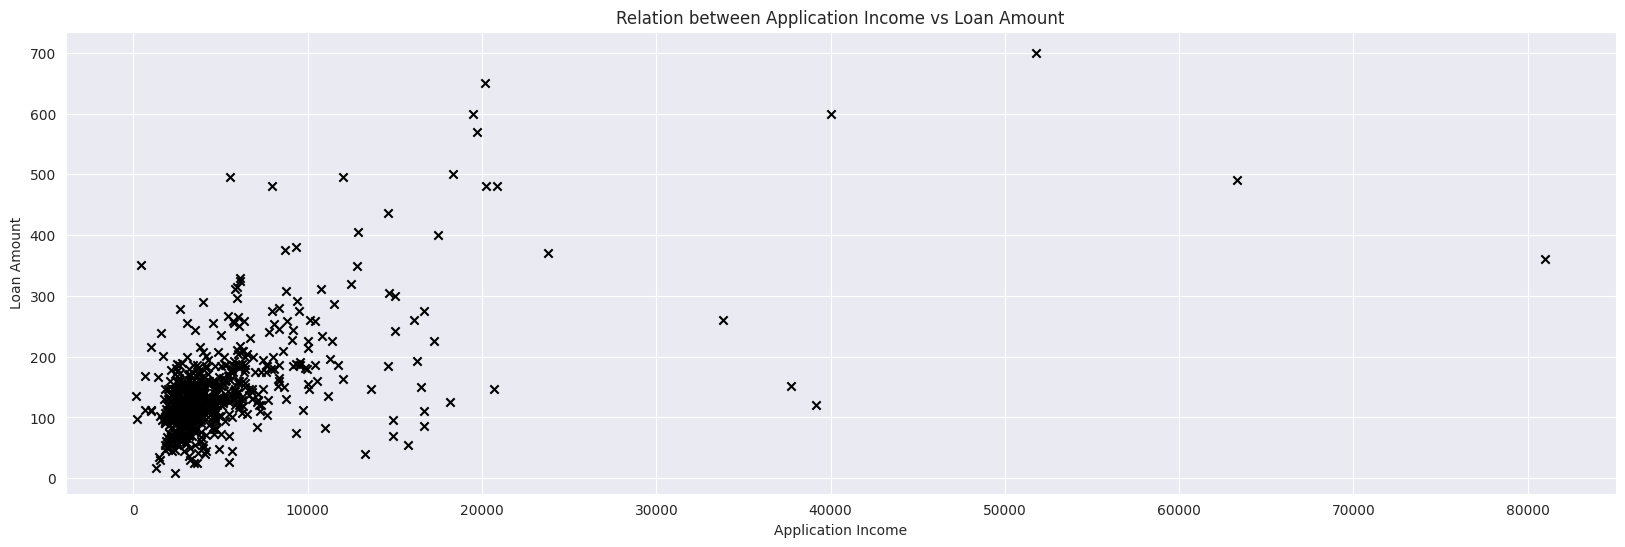

In [66]:
plt.figure(figsize=(20,6))
plt.title("Relation between Application Income vs Loan Amount")
plt.grid()
plt.scatter(train_data['ApplicantIncome'], train_data['LoanAmount'], c='k', marker='x')
plt.xlabel("Application Income")
plt.ylabel("Loan Amount")
plt.show()

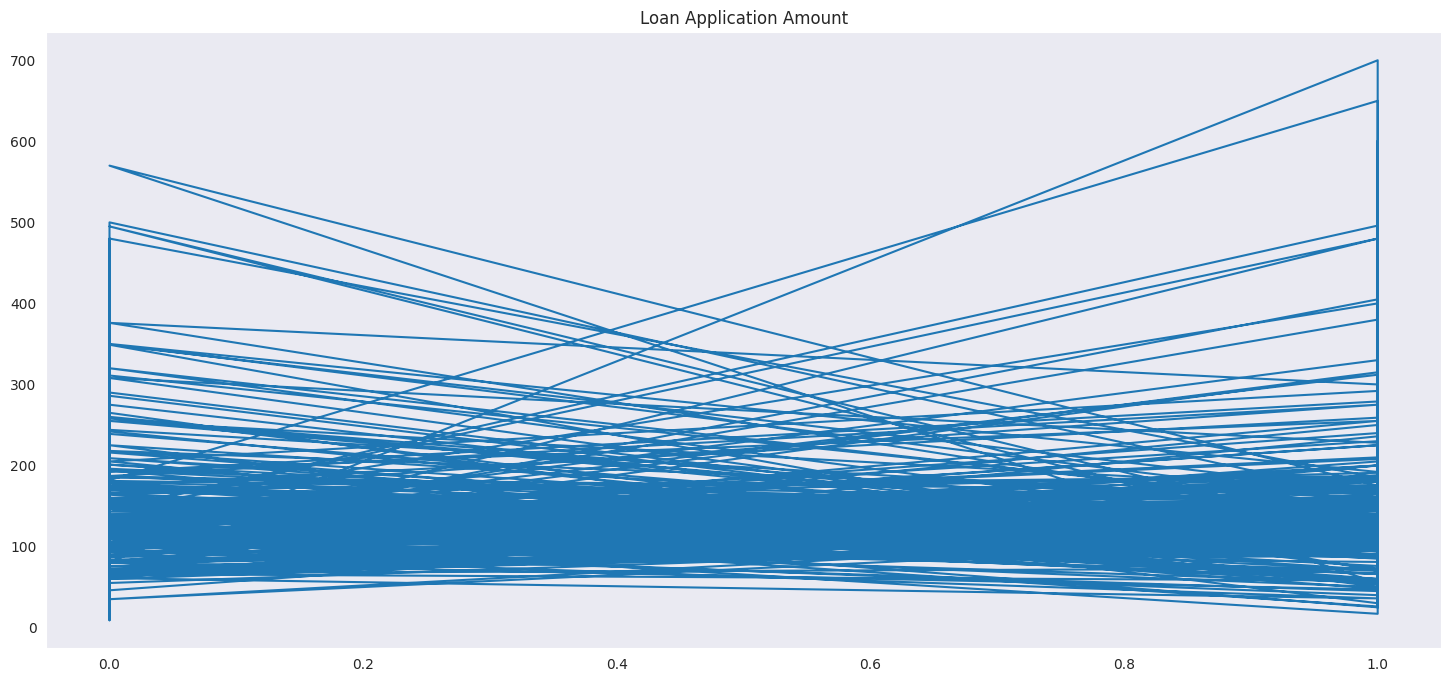

In [67]:
plt.figure(figsize=(18,8))
plt.plot(train_data['Loan_Status'], train_data['LoanAmount'])
plt.title("Loan Application Amount")
plt.show()